# Temperature Analysis

### Overview
This code performs an analysis of historical temperature data, focusing on the years 2005 to 2015. It visualizes record high and low temperatures, highlights records broken in 2015, and maps relevant weather stations based on a specific hash ID.

### 1. Importing Required Libraries


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium

### 2. Load the data

In [2]:
data1 = pd.read_csv('temperature (1) (1) (1) (1).csv')

### 3. Data preparation
Convert Date Column: Converts the 'Date' column to a datetime format

In [8]:
data1.head(5)
data1['Date'] = pd.to_datetime(data1['Date'])

#### Filter Data: 
Filters the dataset for the years 2005-2014 and 2015, excluding leap days

In [9]:
data_2005_14 = data1[(data1['Date'].dt.year >= 2005) & (data1['Date'].dt.year <= 2014)]
data_2015 = data1[data1['Date'].dt.year == 2015]
# Remove leap days (February 29th)
data_2005_14 = data_2005_14[data_2005_14['Date'].dt.month != 2 | (data_2005_14['Date'].dt.day != 29)]
data_2015 = data_2015[data_2015['Date'].dt.month != 2 | (data_2015['Date'].dt.day != 29)]

### 4. Daily Temperature Calculation
Calculates the maximum and minimum temperatures for each day of the year (day of year) using groupby operations

In [10]:
daily_max = data_2005_14[data_2005_14['Element'] == 'TMAX'].groupby(data_2005_14['Date'].dt.dayofyear)['Data_Value'].max()
daily_min = data_2005_14[data_2005_14['Element'] == 'TMIN'].groupby(data_2005_14['Date'].dt.dayofyear)['Data_Value'].min()

### 5. Visualization
Temperature Plot: Plots the record high and low temperatures, shading the area between them, and overlays data points for records broken in 2015.

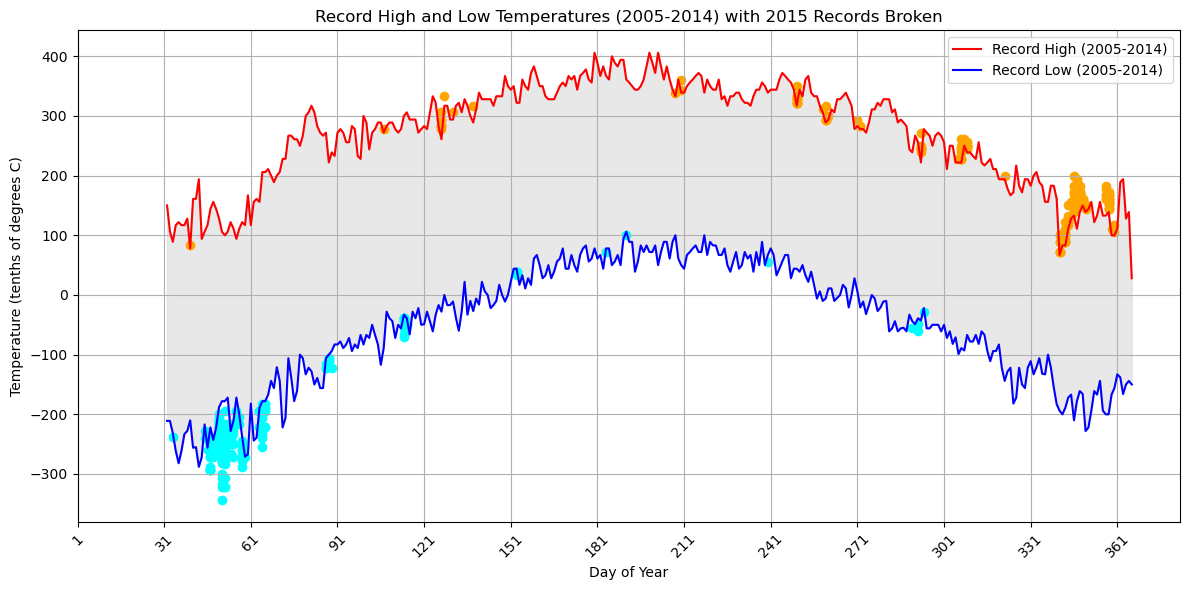

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(daily_max.index, daily_max.values, label='Record High (2005-2014)', color='red')
plt.plot(daily_min.index, daily_min.values, label='Record Low (2005-2014)', color='blue')

# Shade the area between the high and low
plt.fill_between(daily_max.index, daily_max.values, daily_min.values, color='lightgrey', alpha=0.5)

# Overlay 2015 data to see if records were broken
for idx, row in data_2015.iterrows():
    day_of_year = row['Date'].dayofyear
    if row['Element'] == 'TMAX' and row['Data_Value'] > daily_max[day_of_year]:
        plt.scatter(day_of_year, row['Data_Value'], color='orange', label='2015 High Record Broken' if idx == 0 else "")
    elif row['Element'] == 'TMIN' and row['Data_Value'] < daily_min[day_of_year]:
        plt.scatter(day_of_year, row['Data_Value'], color='cyan', label='2015 Low Record Broken' if idx == 0 else "")

# Formatting the plot
plt.title('Record High and Low Temperatures (2005-2014) with 2015 Records Broken')
plt.xlabel('Day of Year')
plt.ylabel('Temperature (tenths of degrees C)')
plt.legend()
plt.grid()
plt.xticks(np.arange(1, 366, 30), rotation=45)  # Monthly ticks
plt.tight_layout()
plt.show()

### 6. Summary Statistics for 2015
Generates a summary (mean, min, max) of the temperature data for the year 2015

               mean  min  max
Element                      
TMAX     168.658394 -161  361
TMIN      49.900912 -343  244


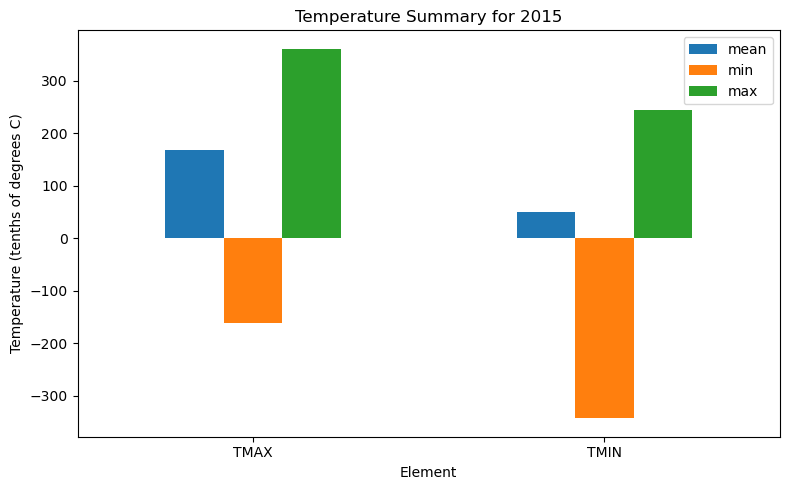

In [5]:
# Temperature summary for 2015
summary = data_2015.groupby(['Element'])['Data_Value'].agg(['mean', 'min', 'max'])
print(summary)

# Optionally, visualize the summary with a bar chart
summary.plot(kind='bar', figsize=(8, 5))
plt.title('Temperature Summary for 2015')
plt.ylabel('Temperature (tenths of degrees C)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 7. Weather Station Mapping
Loads a separate dataset of weather stations and filters it by a specific hashid

In [6]:

# Load your dataset
# Replace 'data.csv' with the actual path to your dataset
data = pd.read_csv('BinSize (1) (1) (1) (1).csv')

# Specify the hashid you want to filter by
hashid = 'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89'  # Replace with the actual hashid

# Filter the dataset for the specific hashid
filtered_stations = data[data['hash'] == hashid]

# Check if the filtered dataset is not empty
if not filtered_stations.empty:
    # Extract relevant information
    stations = filtered_stations[['NAME', 'LATITUDE', 'LONGITUDE']].copy()

    # Create a map centered on the mean coordinates
    center_lat = stations['LATITUDE'].mean()
    center_lon = stations['LONGITUDE'].mean()
    m = folium.Map(location=[center_lat, center_lon], zoom_start=7)

    # Add markers for each station
    for _, station in stations.iterrows():
        folium.Marker(
            location=[station['LATITUDE'], station['LONGITUDE']],
            popup=station['NAME'],
            tooltip=station['NAME']
        ).add_to(m)

else:
    print(f"No stations found for hashid: {hashid}")

m
